In [14]:
import numpy as np
from pandas_datareader import data as wb 
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
tickers = ['PG', 'MSFT', 'F', 'GE']
my_data = pd.DataFrame()
for t in tickers:
    my_data[t] = wb.DataReader(t, data_source = 'yahoo', start = '1995-1-1')['Adj Close']

In [3]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6355 entries, 1995-01-03 to 2020-03-30
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PG      6355 non-null   float64
 1   MSFT    6355 non-null   float64
 2   F       6355 non-null   float64
 3   GE      6355 non-null   float64
dtypes: float64(4)
memory usage: 248.2 KB


In [4]:
my_data.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,6.362402,2.413537,3.256691,2.729230
1995-01-04,6.311406,2.431082,3.344314,2.729230
1995-01-05,6.222151,2.390982,3.315107,2.735919
1995-01-06,6.234900,2.431082,3.315107,2.722540
1995-01-09,6.209402,2.416045,3.373522,2.695783


### Normalization to 100       -        P1/P0 * 100

In [5]:
my_data.iloc[0]

PG      6.362402
MSFT    2.413537
F       3.256691
GE      2.729230
Name: 1995-01-03 00:00:00, dtype: float64

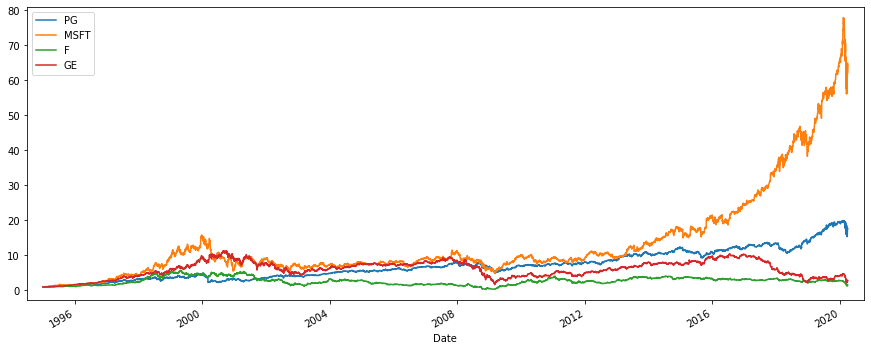

In [6]:
(my_data / my_data.iloc[0]).plot(figsize = (15,6))
plt.margins(0.02, 0.04)
plt.show()

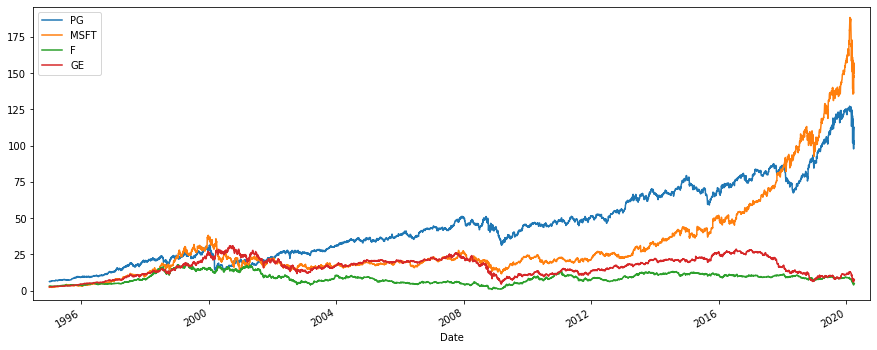

In [7]:
my_data.plot(figsize = (15, 6))
plt.margins(0.02, 0.04)
plt.show()

In [8]:
my_data.loc['1995-1-3']

PG      6.362402
MSFT    2.413537
F       3.256691
GE      2.729230
Name: 1995-01-03 00:00:00, dtype: float64

In [9]:
my_data.iloc[0]

PG      6.362402
MSFT    2.413537
F       3.256691
GE      2.729230
Name: 1995-01-03 00:00:00, dtype: float64

# Calculating the Return of a Portfolio

In [10]:
returns = (my_data / my_data.shift(1))-1
returns.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008015,0.007269,0.026906,0.000000
1995-01-05,-0.014142,-0.016495,-0.008733,0.002451
1995-01-06,0.002049,0.016771,0.000000,-0.004890
1995-01-09,-0.004090,-0.006185,0.017621,-0.009828


In [27]:
weights = np.array([0.25, 0.25, 0.25, 0.25])
weights

array([0.25, 0.25, 0.25, 0.25])

In [12]:
avg_return_a = returns.mean() * 250
avg_return_a

PG      0.138843
MSFT    0.214152
F       0.095785
GE      0.088656
dtype: float64

In [17]:
np.dot(avg_return_a, weights)

0.13435918896915428

In [23]:
# another way to calculate portfolio return
np.sum(weights * returns.mean())*250

0.13435918896915428

In [18]:
port_return = (str(round(np.dot(avg_return_a, weights), 5) *100) + ' %')
port_return

'13.436 %'

In [19]:
# comparing aforementioned weights with differet one
weights_2 = np.array([0.4, 0.4, 0.15, 0.05])

In [20]:
port_return_2 = (str(round(np.dot(avg_return_a, weights_2), 5) *100) + ' %')
print(port_return)
print(port_return_2)

13.436 %
16.0 %


## Calculating the Return of Indices

In [ ]:
tickers = ['^GSPC', '^IXIC', '^GDAXI']
data_ind = pd.DataFrame()

for t in tickers:
    data_ind[t] = wb.DataReader(t, data_source = 'yahoo', start = '1997-1-1')['Adj Close']

In [ ]:
data_ind.head()

In [ ]:
(data_ind / data_ind.iloc[0] * 100).plot(figsize = (15,6))
plt.margins(0.02,0.03)
plt.show()

In [ ]:
ind_return = (data_ind / data_ind.shift(1) - 1) * 250
ind_return.head()

In [ ]:
annual_return = ind_return.mean() * 250
annual_return

### Comparing PG with US Indices

In [ ]:
tickers = ['PG', '^GSPC', '^DJI']

data_compare = pd.DataFrame()

for t in tickers:
    data_compare[t] = wb.DataReader(t, data_source = 'yahoo', start = '2007-1-1')['Adj Close']

In [ ]:
data_compare.head()

In [ ]:
(data_compare / data_compare.iloc[0] * 100).plot(figsize = (15,6))
plt.margins(0.02, 0.03)
plt.show()